# Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import sklearn as sk
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn import linear_model

## Get the Data

In [2]:
df_heart = pd.read_csv('https://www.palmetto.clemson.edu/dsci/datasets/isl/Heart.csv')

In [3]:
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## Convert AHD Column to Numeric Data

In [4]:
df_heart['AHD'].unique().tolist()

['No', 'Yes']

In [5]:
ahd_mapping = {'No': 0, 'Yes': 1}

In [6]:
df_heart['AHD'] = df_heart['AHD'].map(ahd_mapping)

In [7]:
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


## Visualize the Data

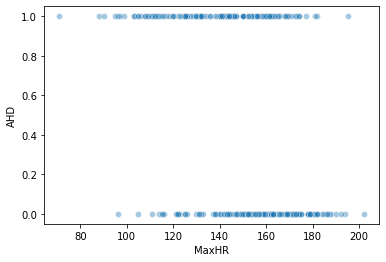

In [8]:
sns.scatterplot(x="MaxHR", y="AHD", markers='o', alpha=0.4, data=df_heart)
plt.show()

### Plot Linear Regression

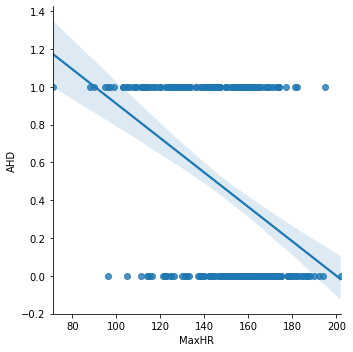

In [9]:
sns.lmplot(x="MaxHR", y="AHD", data=df_heart)
plt.show()

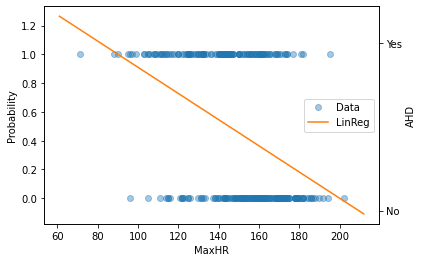

In [10]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel("MaxHR")
ax.set_ylabel("Probability")
par1 = ax.twinx()
par1.set_ylabel("AHD")

data_x = df_heart['MaxHR']
data_y = df_heart['AHD']
regr = sk.linear_model.LinearRegression(fit_intercept=True)
regr.fit(data_x.values.reshape(-1,1), data_y)

x=np.linspace(np.min(data_x)-10,np.max(data_x)+10)
y_ = regr.predict(x.reshape(-1,1))

ax.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
ax.plot(x, y_, label='LinReg')

labels = ['No', 'Yes']
par1.set_yticks( [0.061, 0.83])
par1.set_yticklabels(labels)
par1.set_yticklabels(labels)

ax.legend(loc=5)
plt.show()

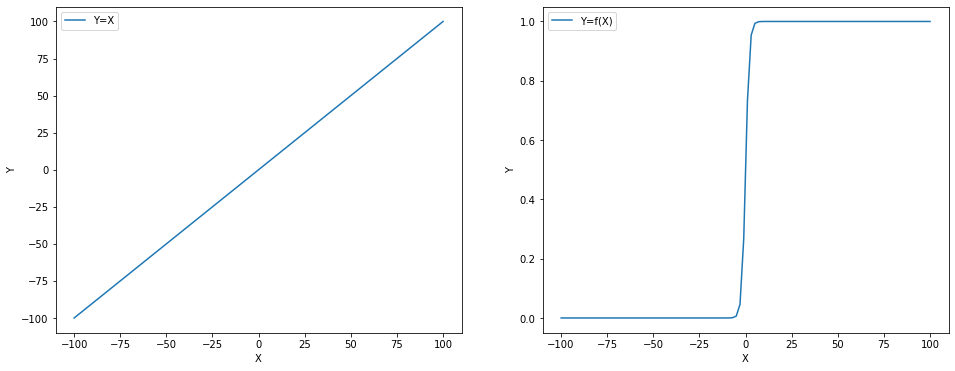

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

x = np.linspace(-100, 100, 100)
y = x
yl = 1/(1+np.exp(-y))

ax[0].plot(x, y, label='Y=X')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].legend()

ax[1].plot(x, yl, label='Y=f(X)')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend()

plt.show()

RuntimeError: Requested MovieWriter (ffmpeg) not available

$\beta_0=$ -40


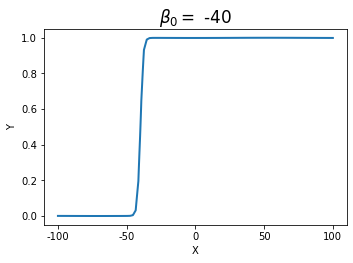

In [12]:
from matplotlib import animation, rc
from IPython.display import HTML

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.patch.set_alpha(1.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

line,  = ax.plot(x,yl, label=r'$Y=\frac{1}{1+e^{-(X+\beta_0) }}$')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend(loc=5)

def update(i):
    b0=2*i
    label = r'$\beta_0=$ {0}'.format(b0)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata( 1/(1+np.exp(-x+b0)))
    ax.set_title(label)
    return line, ax

# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(-20, 20, 2), interval=4, blit=False)
HTML(anim.to_html5_video())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

## Likelihood Functions

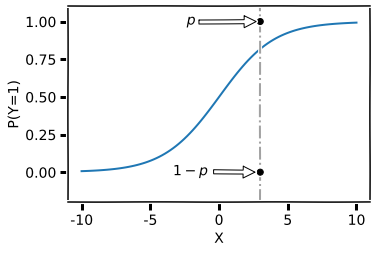

In [18]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
# plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x = np.linspace(-10, 10, 100)
y = x
yl = 1/(1+np.exp(-0.5*y))

#plt.plot(x,yl, label=r'$P(Y=1)=\frac{1}{1+e^{-X\beta}}$')
plt.plot(x,yl)
plt.xlabel('X')
plt.ylabel('P(Y=1)')
# plt.legend()
plt.ylim((-0.2, 1.1))
#plt.savefig('fig/Likelihood1.png', dpi=300, transparent=True)

### FRAME 2 

plt.axvline(x=3, color='#A2A2A2', ls='-.')
#plt.savefig('fig/Likelihood2.png', dpi=300, transparent=True)

### FRAME 3
plt.annotate(r'  $P(y=1|x=3)$', xy=(3, .83),\
             xytext=(-8, .81),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
# plt.savefig('fig/Likelihood3.png', dpi=300, transparent=True)

### FRAME 4

plt.annotate(r'  $p=P(y=1|x=3)$', xy=(3, .83),\
             xytext=(-10, .81),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
# plt.savefig('fig/Likelihood4.png', dpi=300, transparent=True)


### FRAME 5

plt.clf()
plt.ylim((-0.2, 1.1))
plt.plot(x,yl)
plt.xlabel('X')
plt.ylabel('P(Y=1)')
plt.axvline(x=3, color='#A2A2A2', ls='-.')
coinf = np.random.binomial(1, 0.7, size=1)
plt.plot( [3], [0], 'ko')
plt.plot( [3], [1], 'ko')

plt.annotate(r'  $p$', xy=(2.7, 1),\
             xytext=(-3, 0.98),
            arrowprops=dict(facecolor='white', shrink=0.0),
            )
plt.annotate(r'  $1-p$', xy=(2.8, .00),\
             xytext=(-4, -.02),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
# plt.savefig('fig/Likelihood5.png', dpi=300, transparent=True)

plt.show()



## Plots for simple model

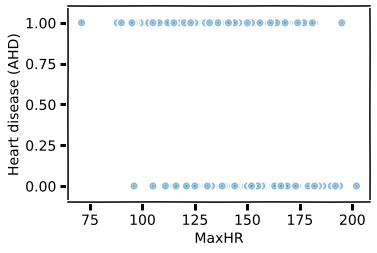

In [19]:
from sklearn import linear_model

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

plt.ylim((-0.1, 1.1))


plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")




data_x = df_heart['MaxHR']
data_y = df_heart['AHD']

plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression

data_x = df_heart['MaxHR']
data_y = df_heart['AHD']
logreg = LogisticRegression(C=100000, fit_intercept=True,solver='lbfgs')
logreg.fit(data_x.values.reshape(-1,1), data_y);

print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.04341112]]
Estimated beta0: 
 [6.3249492]


Text(0, 0.5, 'Heart disease (AHD)')

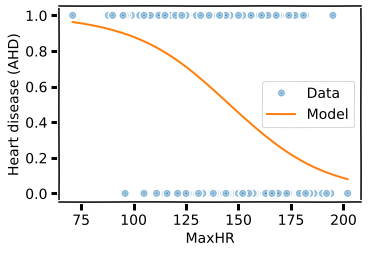

In [22]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x))
yhat = logreg.predict_proba(x.reshape(-1,1))[:,1]
plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.plot(x,yhat, label='Model')
plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")

# plt.savefig('fig/FittingLogR2.png', dpi=300, transparent=True)

In [23]:
data_x = df_heart['Sex']
data_y = df_heart['AHD']

idx0 = np.where(data_x.values==0)
idx1 = np.where(data_x.values==1)

print("percentage of females with HD", data_y.values[idx0].sum()/idx0[0].shape)
print("percentage of males with HD", data_y.values[idx1].sum()/idx1[0].shape)

pd.crosstab(df_heart['Sex'],df_heart['AHD'])


percentage of females with HD [0.25773196]
percentage of males with HD [0.55339806]


AHD,0,1
Sex,,
0,72,25
1,92,114


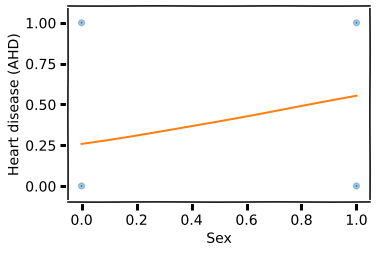

In [24]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

plt.ylim((-0.1, 1.1))

plt.xlabel("Sex")
plt.ylabel("Heart disease (AHD)")


data_x = df_heart['Sex']
data_y = df_heart['AHD']
logreg.fit(data_x.values.reshape(-1,1), data_y);

x=np.linspace(np.min(data_x),np.max(data_x))
yhat = logreg.predict_proba(x.reshape(-1,1))[:,1]

plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.plot(x,yhat, label='Model')
plt.show()

In [26]:
print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[1.27219333]]
Estimated beta0: 
 [-1.0577853]


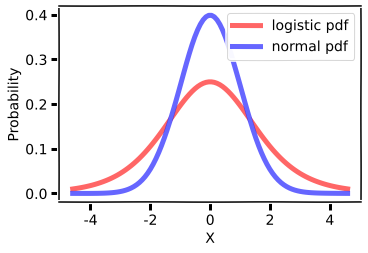

In [28]:
from scipy.stats import logistic
from scipy.stats import norm 
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)
plt.plot(x, logistic.pdf(x,loc=0, scale=1),   'r-', lw=5, alpha=0.6, label='logistic pdf')
plt.plot(x, norm.pdf(x,loc=0, scale=1),   'b-', lw=5, alpha=0.6, label='normal pdf')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()


plt.savefig('fig/NormVsLog.png', dpi=300, transparent=True)

In [37]:
data_x = df_heart[['MaxHR','Sex']]
data_y = df_heart['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True,solver='lbfgs')
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2: 
 [[-0.04508908  1.40621576]]
Estimated beta0: 
 [5.60186105]


In [38]:
df_heart['Interaction'] = df_heart.MaxHR * df_heart.Sex 

data_x = df_heart[['MaxHR','Sex', 'Interaction']]
data_y = df_heart['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True, solver='lbfgs')
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2, beta3: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2, beta3: 
 [[-0.02659135  5.41504863 -0.02707095]]
Estimated beta0: 
 [2.90189609]


[2 2 2 0 2 0 2 0 2 2 0 2 2 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 0 2 2 2 0 0 2 2 0 2 0 2 2 2 0 2 2 0 0 2 2 2 2 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 0 0 2
 2 2 2 0 0 2 0 2 2 2 2 0 0 2 2 2 0 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 0 2 0 2 0
 2 0 0 2 2 2 2 2 0 2 2 0 0 2 0 2 0 0 0 2 2 0 0 2 0 2 2 0 0 2 0 2 2 2 2 2 2
 0 0 0 2 2 0 0 2 0 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 0 0 2 0 0 2 0 2 0 2 2 2
 0 0 0 0 0 0 2 2 2 1 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 1 2
 0 0 2 0 0 2 0 0 0 0 0 2 2 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2 0 2 0 2 0 0 2 0 0
 2 0 0 0 0 2 0]


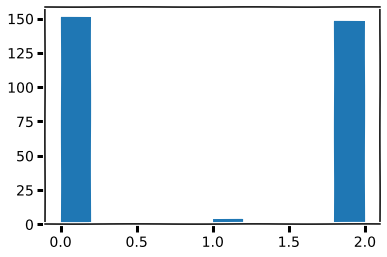

In [31]:
# Response for Multinomial Logistic Regression Example

print(df_heart.RestECG.values)
plt.hist(df_heart.RestECG.values)
plt.show()

In [32]:
# Multinomial Logistic Regression Example

data_x = df_heart[['Sex']]
data_y = df_heart['RestECG']

logitm = LogisticRegression(C = 10000000,solver='lbfgs')
logitm.fit(data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)


Estimated beta1: 
 [[ 0.57896717]
 [-1.25284168]
 [ 0.67387452]]
Estimated beta0: 
 [ 0.95944398 -1.83373675  0.87429277]


In [33]:
logitm = LogisticRegression(C = 10000000,solver='lbfgs',multi_class='ovr')
logitm.fit (data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[-0.04003728]
 [-1.87833213]
 [ 0.1445807 ]]
Estimated beta0: 
 [ 0.02061932 -3.44468483 -0.14458062]


In [34]:
logitm = LogisticRegression(C = 10000000,solver='lbfgs',multi_class='multinomial')
logitm.fit (data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[ 0.57896717]
 [-1.25284168]
 [ 0.67387452]]
Estimated beta0: 
 [ 0.95944398 -1.83373675  0.87429277]


In [35]:
logitm = LogisticRegression(C = 10000000,solver='lbfgs')
logitm.fit (df_heart[['Sex','MaxHR','Interaction']], df_heart['RestECG'])
# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[ 1.79887601  0.02312293 -0.00960605]
 [-4.68356152 -0.04441023  0.02581084]
 [ 2.8846855   0.0212873  -0.01620479]]
Estimated beta0: 
 [-2.21887567  4.25452226 -2.03564659]
